# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as layer
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 28.4MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [ ]:
df = pd.read_csv('/content/Traffic Data.csv')

In [ ]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [ ]:
# because we want to let the date colunm is the indix
df['date_time'] = pd.to_datetime(df['date_time'])

In [ ]:
df.sort_values(by ='date_time' , inplace = True)

In [ ]:
df.isna().sum()#check missing value

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.drop_duplicates(subset='date_time' , inplace= True)

In [ ]:
df.set_index('date_time' , inplace = True)

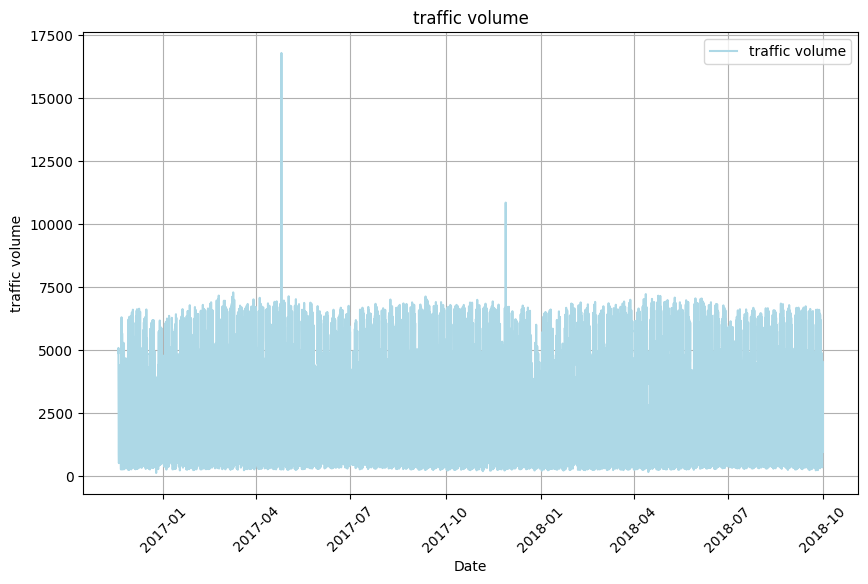

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['traffic_volume'], color='lightblue', label= 'traffic volume')
plt.title('traffic volume')
plt.xlabel('Date')
plt.ylabel('traffic volume')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
#from here i will start to visualise the relation ships between the feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16257 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       16257 non-null  float64
 1   temp                 16257 non-null  float64
 2   rain_1h              16257 non-null  float64
 3   snow_1h              16257 non-null  float64
 4   clouds_all           16257 non-null  int64  
 5   weather_main         16257 non-null  object 
 6   weather_description  16257 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1016.1+ KB


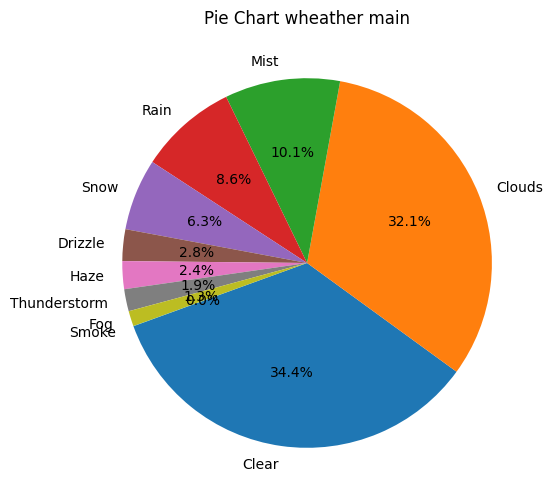

In [ ]:
plt.figure(figsize=(10, 6))
df['weather_main'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=200)
plt.title('Pie Chart wheather main')
plt.ylabel('')
plt.show()


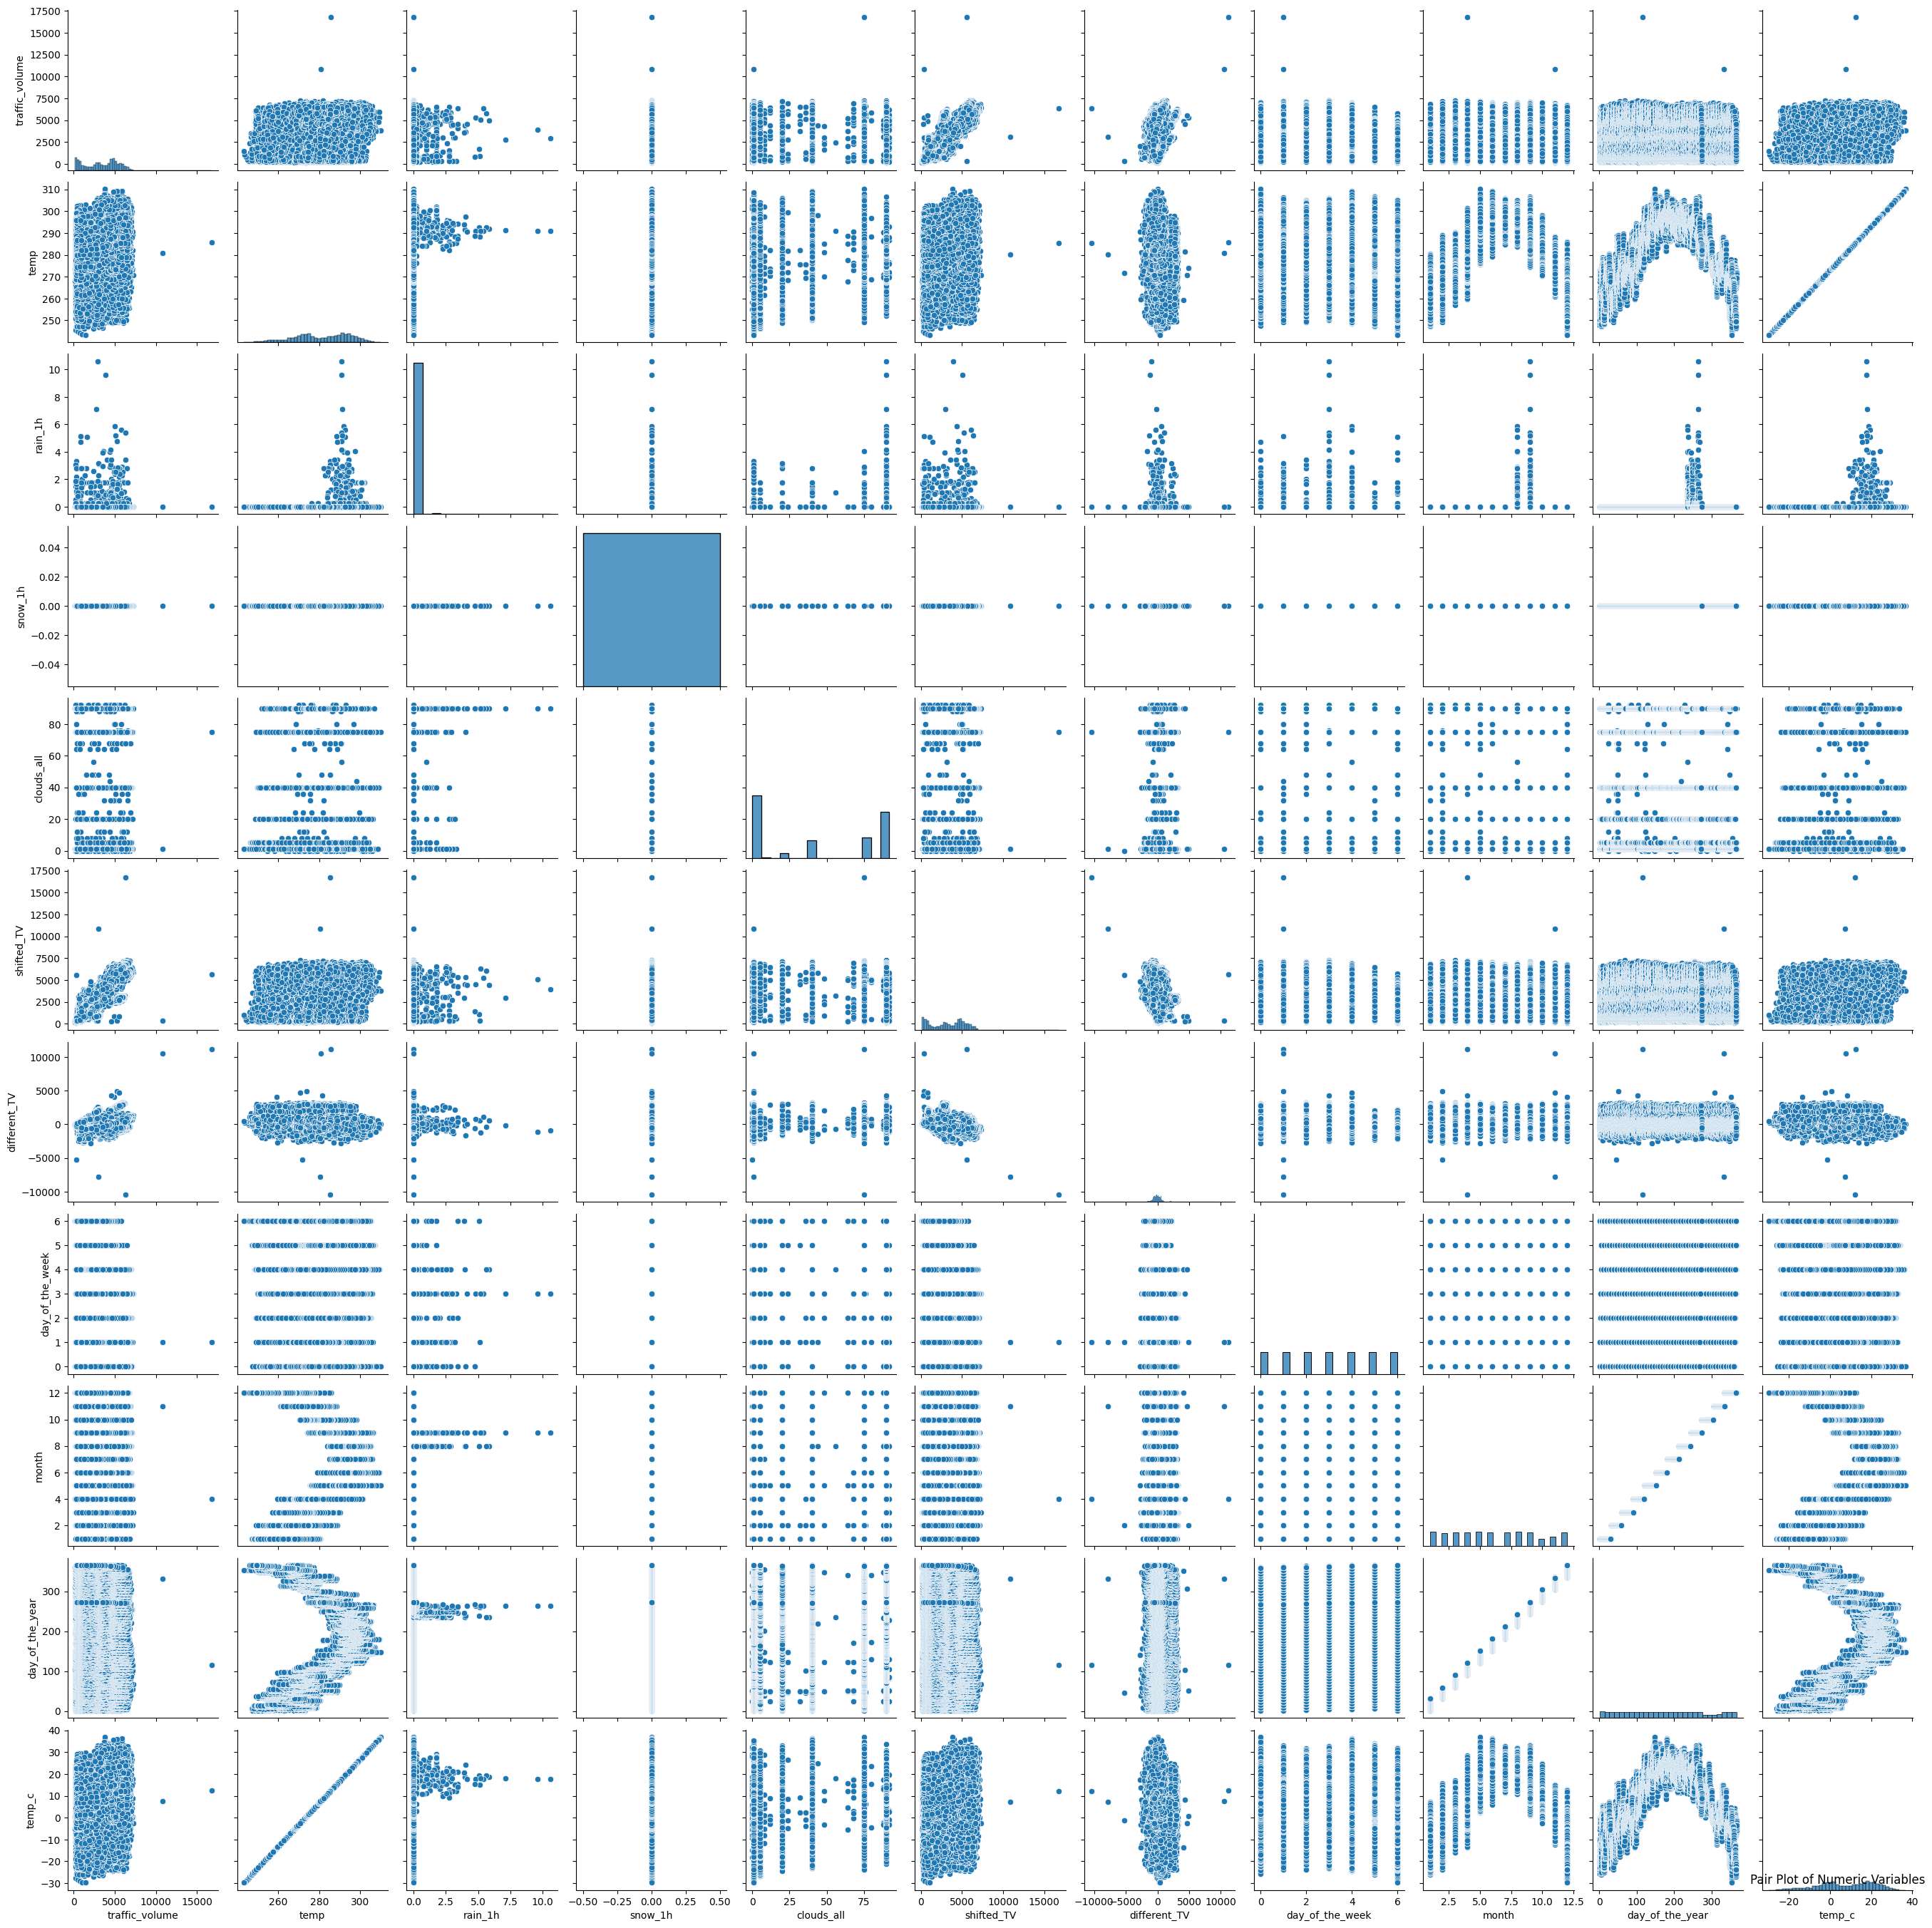

In [ ]:
numeric = df.select_dtypes(include=[np.number])
sns.pairplot(numeric)
plt.title('Pair Plot of Numeric Variables', y=0.001)
plt.show()

In [ ]:
df.sample(10)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,shifted_TV,different_TV,day_of_the_week,month,day_of_the_year,temp_c
date_time,,,,,,,,,,,,,
2018-01-10 22:00:00,1596.0,275.15,0.0,0.0,90,Fog,fog,2342.0,-746.0,2,1,10,2.00
2017-08-27 08:00:00,2480.0,290.51,0.0,0.0,90,Mist,mist,1665.0,815.0,6,8,239,17.36
2018-08-17 17:00:00,5141.0,301.22,0.0,0.0,90,Clouds,overcast clouds,5734.0,-593.0,4,8,229,28.07
2017-06-04 05:00:00,663.0,287.65,0.0,0.0,1,Clear,sky is clear,658.0,5.0,6,6,155,14.50
2018-03-30 16:00:00,6137.0,275.55,0.0,0.0,90,Snow,light snow,5936.0,201.0,4,3,89,2.40
2017-10-02 18:00:00,3897.0,291.41,0.0,0.0,90,Mist,mist,5599.0,-1702.0,0,10,275,18.26
2018-06-30 07:00:00,2048.0,299.92,0.0,0.0,75,Clouds,broken clouds,1489.0,559.0,5,6,181,26.77
2017-07-05 23:00:00,1335.0,298.88,0.0,0.0,1,Clear,sky is clear,1930.0,-595.0,2,7,186,25.73
2018-07-02 10:00:00,4172.0,297.07,0.0,0.0,1,Clear,sky is clear,4473.0,-301.0,0,7,183,23.92


In [ ]:
# i did not under stand my data whene the temp was in K so i wrote this code that will generate new col for temp in C
df['temp_c'] = df['temp'] - 273.15

<Axes: xlabel='traffic_volume', ylabel='rain_1h'>

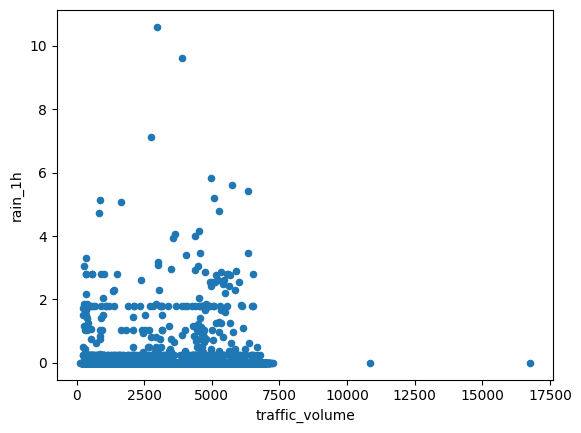

In [ ]:
df.plot.scatter(x='traffic_volume', y='rain_1h')


In [ ]:
df.plot.scatter(x='traffic_volume', y='temp_c')

## Data Preprocessing


In [ ]:
df.isna().sum()#another checking

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


<function matplotlib.pyplot.show(close=None, block=None)>

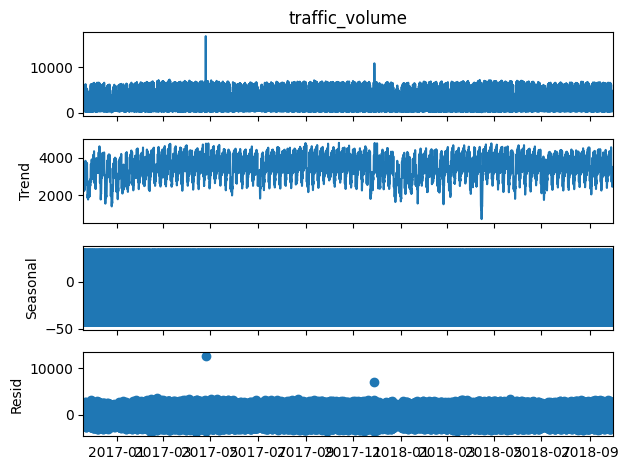

In [ ]:
show = seasonal_decompose(df['traffic_volume'], model = 'additive', period= 20)
show.plot()
plt.show

In [ ]:
# because i only want the target colunm
new_df = df[['traffic_volume']]

In [ ]:
new_df = new_df.sort_values(by = ['date_time'])

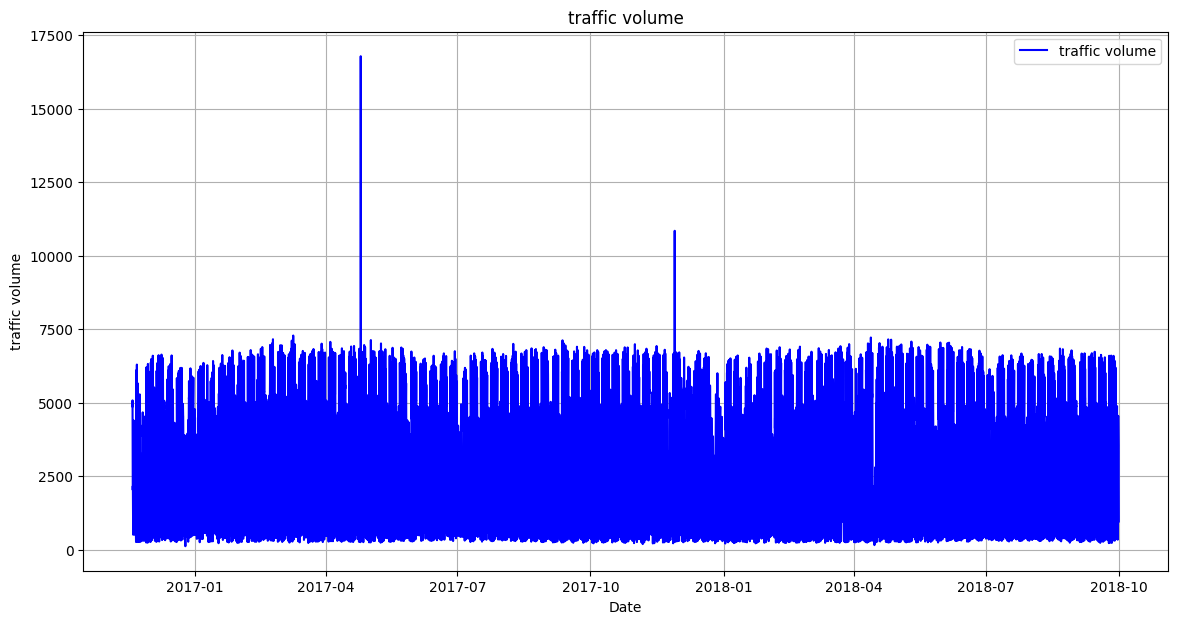

In [ ]:
#visulize my new data frame to see the different , i know my data is small set put it did not work when it was too large
plt.figure(figsize=(14, 7))
plt.plot(new_df, color='blue', label= 'traffic volume')
plt.title('traffic volume')
plt.xlabel('Date')
plt.ylabel('traffic volume')
plt.legend()
plt.grid(True)
plt.show()

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [ ]:
df['shifted_TV'] = df['traffic_volume'].shift(1)

In [ ]:
df['different_TV'] = df['traffic_volume'].diff()

In [ ]:
df['day_of_the_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_the_year'] = df.index.dayofyear

In [ ]:
data = df[['traffic_volume']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
data = df[['traffic_volume']]

def create_sequences(data, length):
    X = []
    y = []
    for i in range(length, len(data)):
        X.append(data[i-length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

length = 50

X, y = create_sequences(scaled_data, length)
X = X.reshape((X.shape[0], X.shape[1], 1))


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [ ]:
split = int(0.85 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [ ]:
#i did it above

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

## LSTM



In [ ]:
tf.random.set_seed(10)

In [ ]:
model1 = Sequential([
    layer.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),\
    layer.Dropout(0.2),
    layer.LSTM(units=50, return_sequences=True),
    layer.Dropout(0.2),
    layer.LSTM(units=50),
    layer.Dropout(0.2),
    layer.Dense(units=1)
    ])

In [ ]:
model1.compile(loss='mean_squared_error', optimizer='adam')

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [ ]:
model1.fit(X_train, y_train, epochs=5, batch_size=20)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0099
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.0036
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0025
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0019
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0016


In [ ]:
model1.compile(loss='mean_squared_error', optimizer='adam')

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
prediction1 = model1.predict(X_test)

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

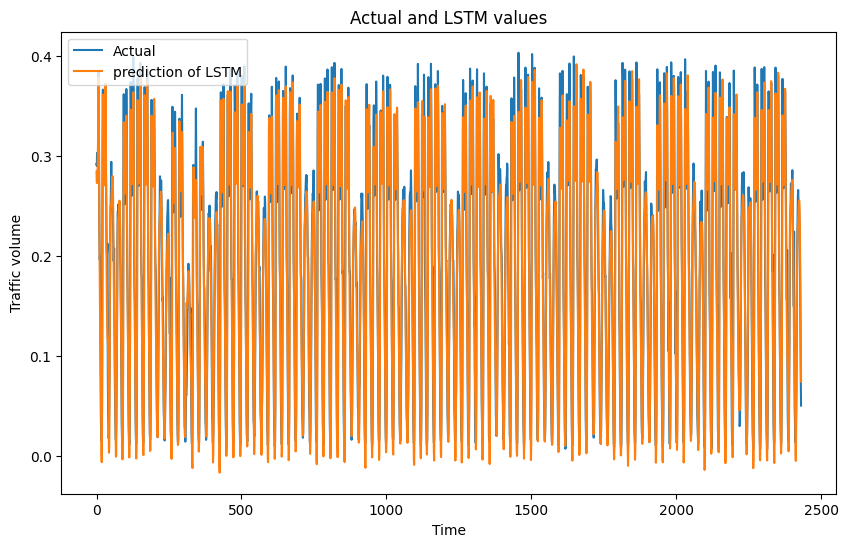

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(prediction1, label='prediction of LSTM')
plt.title('Actual and LSTM values')
plt.xlabel('Time')
plt.ylabel('Traffic volume')
plt.legend()
plt.show()

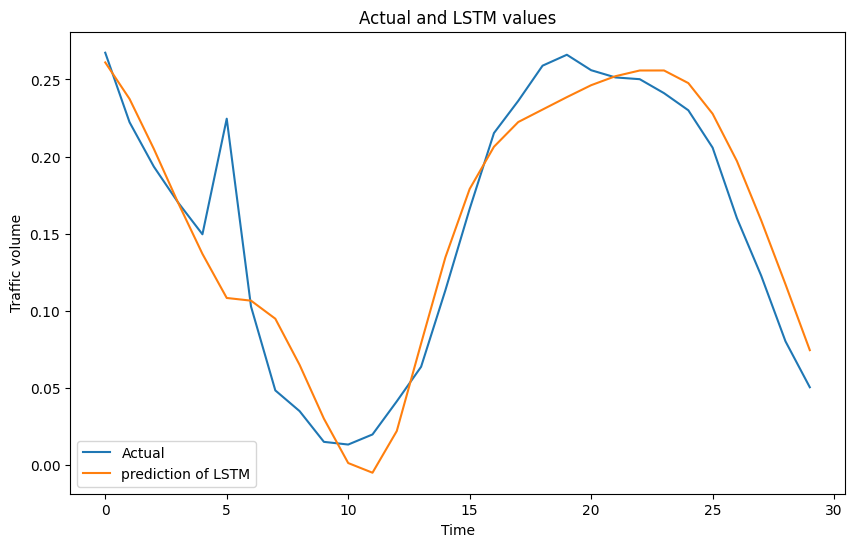

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[-30:], label='Actual')
plt.plot(prediction1[-30:], label='prediction of LSTM')
plt.title('Actual and LSTM values')
plt.xlabel('Time')
plt.ylabel('Traffic volume')
plt.legend()
plt.show()

In [ ]:
prediction1_INV = scaler.inverse_transform(prediction1.reshape(-1, 1))
y_test_actual_INV = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
mse = mean_squared_error(y_test_actual_INV, prediction1_INV)
print(f"Mean Squared Error (MSE): {mse:.2f}")
rmse = mean_squared_error(y_test_actual_INV, prediction1_INV, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 201207.35
Root Mean Squared Error (RMSE): 448.56


## Model 2

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [ ]:
model2 = Sequential([
    layer.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    layer.GRU(units=50, return_sequences=True),
    layer.GRU(units=50),
    layer.Dense(units=1)
    ])

In [ ]:
model2.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model2.fit(X_train, y_train, epochs=5, batch_size=20)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0059
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0012
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 9.5566e-04
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 9.0137e-04
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 8.3531e-04


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
prediction2 = model2.predict(X_test)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

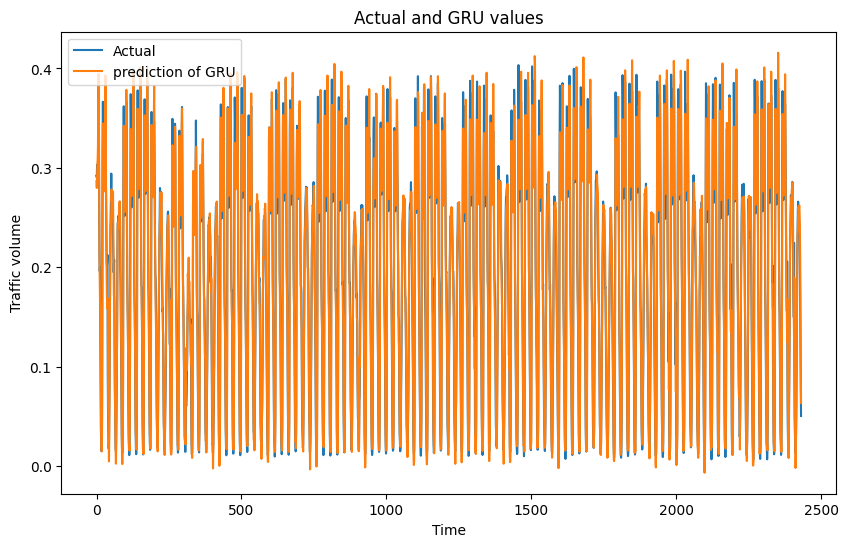

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(prediction2, label='prediction of GRU')
plt.title('Actual and GRU values')
plt.xlabel('Time')
plt.ylabel('Traffic volume')
plt.legend()
plt.show()

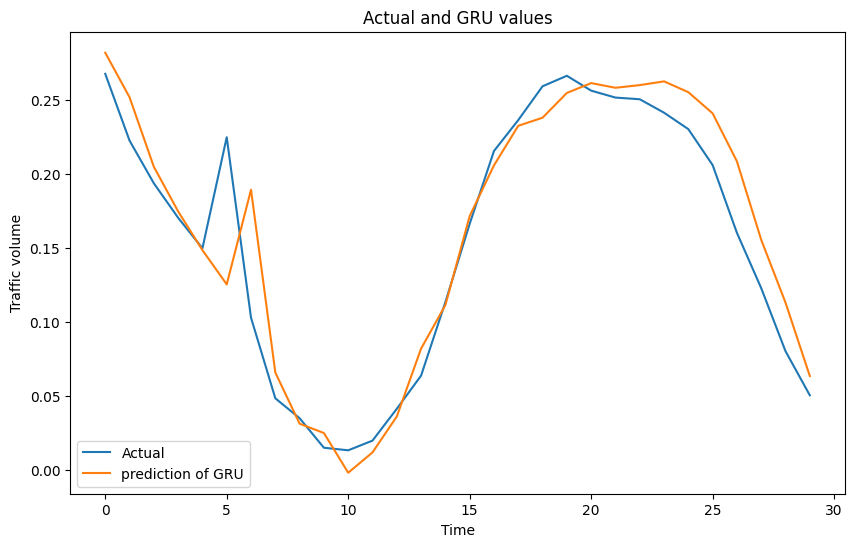

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[-30:], label='Actual')
plt.plot(prediction2[-30:], label='prediction of GRU')
plt.title('Actual and GRU values')
plt.xlabel('Time')
plt.ylabel('Traffic volume')
plt.legend()
plt.show()

In [ ]:
prediction2 = scaler.inverse_transform(prediction2.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
mse = mean_squared_error(y_test_actual, prediction2)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = mean_squared_error(y_test_actual, prediction2, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 136599.58
Root Mean Squared Error (RMSE): 369.59


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1 /
* i drop the missing value that i found it in  my target colunm using df.dropna(inplace = True)

then i create new dataset to store the traffic volume colounm without throing my original dataframe


2 /
* i use for feature engine in tow parts:
first whene i convert the colounm to Celeluse for visulize only , and for discover the pattren and relations between the data
* then i extract meaningful features from the date_time colunm which was
- Day of the week: To capture weekly seasonality.
- Month: To capture monthly trends.
- Day of the year: Useful for modeling yearly seasonality.
and it helps me to understanding my data will

3 /
for model choosing and artchicture i choose the GRU and LSTM because i belive in my personal perspective that it will fit my data whene i train the model , and also because they are not statical methods

4/
i choose 5 epoches because the GPU its not helping

5/
i use MSR & RMSE
my first model
Mean Squared Error (MSE): 201207.35
Root Mean Squared Error (RMSE): 448.56

and my second model
Mean Squared Error (MSE): 136599.58
Root Mean Squared Error (RMSE): 369.59


7/
there is no over fitting  or under fitting because when i read the statical
methods i found it relastic

